In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D, LSTM
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
print("")

In [19]:
## Seeding
np.random.seed(42)
tf.random.set_seed(42)

## Loading the dataset and then normalizing the images.
dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Hyperparameters
H = 28
W = 28
C = 1

## Latent space
latent_dim = 128

In [20]:
# ## Building the autoencoder
# inputs = Input(shape=(H, W, C), name="inputs")
# x = inputs

# x = Conv2D(32, (3, 3), padding="same")(x)
# x = BatchNormalization()(x)
# x = LeakyReLU(alpha=0.2)(x)
# x = MaxPool2D((2, 2))(x)

# x = Conv2D(64, (3, 3), padding="same")(x)
# x = BatchNormalization()(x)
# x = LeakyReLU(alpha=0.2)(x)
# x = MaxPool2D((2, 2))(x)

# x = Flatten()(x)
# units = x.shape[1]
# x = Dense(latent_dim, name="latent")(x)
# x = Dense(units)(x)
# x = LeakyReLU(alpha=0.2)(x)
# x = Reshape((7, 7, 64))(x)

# x = Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
# x = BatchNormalization()(x)
# x = LeakyReLU(alpha=0.2)(x)

# x = Conv2DTranspose(1, (3, 3), strides=2, padding="same")(x)
# x = BatchNormalization()(x)
# x = Activation("sigmoid", name="outputs")(x)

# outputs = x
# timesteps = 3

# n_features = 2
# print(x_train.shape, x_test.shape)


In [21]:
# ## Building the autoencoder
# inputs = Input(shape=(H, W, C), name="inputs")
# x = inputs

# x = Conv2D(32, (3, 3), padding="same")(x)
# x = BatchNormalization()(x)
# x = LeakyReLU(alpha=0.2)(x)
# x = MaxPool2D((2, 2))(x)

# x = Conv2D(64, (3, 3), padding="same")(x)
# x = BatchNormalization()(x)
# x = LeakyReLU(alpha=0.2)(x)
# x = MaxPool2D((2, 2))(x)

# x = Flatten()(x)
# units = x.shape[1]
# x = Dense(latent_dim, name="latent")(x)
# x = Dense(units)(x)
# x = LeakyReLU(alpha=0.2)(x)
# x = Reshape((7, 7, 64))(x)

# x = Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
# x = BatchNormalization()(x)
# x = LeakyReLU(alpha=0.2)(x)

# x = Conv2DTranspose(1, (3, 3), strides=2, padding="same")(x)
# x = BatchNormalization()(x)
# x = Activation("sigmoid", name="outputs")(x)

# outputs = x
# timesteps = 3

# n_features = 2
# print(x_train.shape, x_test.shape)


In [22]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(10, 10), return_sequences=True))
model.add(Dense(latent_dim, name="latent"))
model.add(LSTM(10, activation='relu', input_shape=(10, 10), return_sequences=False))

model.add(LSTM(10, activation='relu', input_shape=(10, 10), return_sequences=True))
model.add(Dense(latent_dim, name="latent"))
model.add(LSTM(10, activation='relu', input_shape=(10, 10), return_sequences=False))


model.add(LSTM(10, activation='relu', input_shape=(10, 10), return_sequences=True))
model.add(Dense(latent_dim, name="latent"))
model.add(LSTM(10, activation='relu', input_shape=(10, 10), return_sequences=False))

model.add(LSTM(10, activation='relu', input_shape=(10, 10), return_sequences=True))
model.add(Dense(latent_dim, name="latent"))
model.add(LSTM(10, activation='relu', input_shape=(10, 10), return_sequences=False))

model.add(LSTM(10, activation='relu', input_shape=(10, 10), return_sequences=True))
model.add(Dense(latent_dim, name="latent"))
model.add(LSTM(10, activation='relu', input_shape=(10, 10), return_sequences=False))

model.compile(optimizer='adam', loss='mse')
model.summary()

ValueError: Input 0 of layer "lstm_20" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 28)

In [7]:
model.fit(
    x_train,
    x_train,
    epochs=1,
    batch_size=100,
    shuffle=False,
    validation_data=(x_test, x_test)
)

test_pred_y = model.predict(x_test)


ValueError: in user code:

    File "C:\Users\AKINLEYE JOSHUA\miniconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\AKINLEYE JOSHUA\miniconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\AKINLEYE JOSHUA\miniconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\AKINLEYE JOSHUA\miniconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\AKINLEYE JOSHUA\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\AKINLEYE JOSHUA\miniconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 10, 10), found shape=(100, 28, 28)


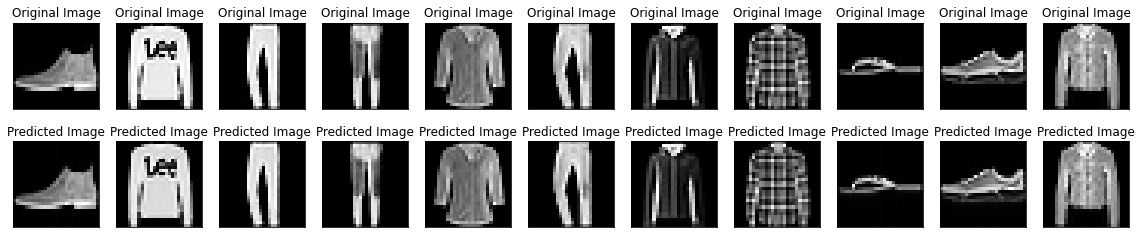

In [7]:
n = 11  ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ## display original
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("Original Image")
    plt.imshow(x_test[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ## display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    ax.set_title("Predicted Image")
    plt.imshow(test_pred_y[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("results/convolutonal_autoencoder.png")